# t-SNE and UMAP Visualizations of Microbial Datasets in Building Materials

In [1]:
# Possible install dependencies

!pip3 install opentsne
!pip3 install umap-learn
!pip3 install scikit-bio

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
  Using cached scikit-bio-0.5.6.tar.gz (8.4 MB)
  Using cached lockfile-0.12.2-py2.py3-none-any.whl (13 kB)
  Using cached CacheControl-0.12.6-py2.py3-none-any.whl (19 kB)
  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
     |████████████████████████████████| 786 kB 5.2 MB/s eta 0:00:01
  Using cached natsort-7.1.1-py3-none-any.whl (35 kB)
     |████████████████████████████████| 11.3 MB 3.0 MB/s eta 0:00:01
  Using cached hdmedians-0.14.2.tar.gz (7.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 2.6 MB/s  eta 0:00:01
  Using cac

  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp39-cp39-macosx_10_9_x86_64.whl size=151620 sha256=3556551ba28bcb4b997aecb389d476aec3e6b3d123e16c9f251081838343ce8d
  Stored in directory: /Users/anthonygriffen/Library/Caches/pip/wheels/3d/80/da/6e9fed5a3829ffca53e6050d58e8fb09a3b635d22a38c96974
Successfully built hdmedians
    Running setup.py install for scikit-bio ... done
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

''' May need command-line installation of umap and openTSNE (GitHub ver) packages:
      conda install umap-learn
      conda install opentsne
'''
# Can alternatively use TSNE from sklearn.manifold or openTSNE
# More details about openTSNE: https://opentsne.readthedocs.io/en/latest/
from sklearn.manifold import TSNE as skTSNE
from openTSNE.sklearn import TSNE as openTSNE
import umap

from skbio.stats.composition import clr
from skbio.stats.distance import permanova
from scipy import stats

%matplotlib inline

## File Format Requirements

1. If ".biom" file, use the following link to convert to txt file: https://biom-format.org/documentation/biom_conversion.html

2. If ".txt" file, use one of the two following code snippet to convert to csv file:
    
    **For comma separated text file:**
        import csv
        with open('filename.txt', 'r') as in_file:
            stripped = (line.strip() for line in in_file)
            lines = (line.split(",") for line in stripped if line)
            with open('filename.csv', 'w') as out_file:
              writer = csv.writer(out_file)
              writer.writerows(lines)
            
    **For tab separated text file:**

        read_file = pd.read_csv (r'16S_OTU_Table.txt', delimiter='\t')
        read_file.to_csv (r'16S_OTU_Table.csv', index=None)

3. If ".csv" or ".tsv", you cannot have a header (it will mess up the conversion to an OTU table)

In [ ]:
''' OPTIONAL: Conversion of original txt files to CSV files

read_file = pd.read_csv (r'16S_OTU_Table.txt', delimiter='\t')
read_file.to_csv (r'16S_OTU_Table.csv', index=None)

read_file = pd.read_csv (r'MappingFile.txt', delimiter='\t')
read_file.to_csv (r'MappingFile.csv', index=None)
'''

## Information on t-SNE
    
Important parameters of "TSNE" function: 
1. metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'


2. perplexity - low values indicate a high degree of local variation, high values indicate the opposite
    * Perplexity of 30 is the default

3. initialization - decides how the initial configuration of points is chose
    * Best results have proven to be found with PCA initialization
    * More details from the following paper: https://doi.org/10.1038/s41587-020-00809-z
    
For more information on how to modify t-SNE parameters, refer to the following link:
https://distill.pub/2016/misread-tsne/

## Information on UMAP:
    
Important parameters of ".UMAP" function: 
1. metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'


2. n_neighbors - number of approximate nearest neighbors used to construct the initial high-dimensional graph
    * Low values prioritize local structure, high values prioritize global structure
    * n_neighbors of 15 is the default


3. min_dist - minimum distance between points in low-dimensional space
    * Low values lead to more tightly packed embeddings
    * min_dist of 0.1 is the default
    
For more information on how to modify UMAP parameters, refer to the following link:
https://pair-code.github.io/understanding-umap/

## Analysis of NGS count data

In [7]:
# Mapping table w/ features of interest
file_loc2 = "non-transformed_data/MappingFile.txt"

NGS_map_table = pd.read_csv(file_loc2, delimiter = '\t')
NGS_map_table = NGS_map_table.set_index('SampleID')
NGS_map_table

,Location,Material,Moisture,Tp,Treatment,Material_Moisture,Material_Location,Moisture_Loaction,Material_Moisture_Location_Timepoint,Material_Moisture_Location,Description,Gypsum,MDF,MF.Gypsum,Plywood,Wet,Timepoint,Location_1,Location_2,Control
SampleID,,,,,,,,,,,,,,,,,,,,
control.Gypsum.dry.TP0,control,Gypsum,dry,0,REG,Gypsum_dry,Gypsum_control,dry_control,Gypsum_dry_control_0,Gypsum_dry_control,control.Gypsum.dry.TP0,1,0,0,0,0,0,0,0,1
control.Gypsum.dry.TP0.DUP,control,Gypsum,dry,0,DUP,Gypsum_dry,Gypsum_control,dry_control,Gypsum_dry_control_0,Gypsum_dry_control,control.Gypsum.dry.TP0.DUP,1,0,0,0,0,0,0,0,1
control.Gypsum.dry.TP1,control,Gypsum,dry,1,REG,Gypsum_dry,Gypsum_control,dry_control,Gypsum_dry_control_1,Gypsum_dry_control,control.Gypsum.dry.TP1,1,0,0,0,0,1,0,0,1
control.Gypsum.dry.TP1.RE,control,Gypsum,dry,1,RE,Gypsum_dry,Gypsum_control,dry_control,Gypsum_dry_control_1,Gypsum_dry_control,control.Gypsum.dry.TP1.RE,1,0,0,0,0,1,0,0,1
control.Gypsum.dry.TP1.RE.DUP,control,Gypsum,dry,1,RE.DUP,Gypsum_dry,Gypsum_control,dry_control,Gypsum_dry_control_1,Gypsum_dry_control,control.Gypsum.dry.TP1.RE.DUP,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,loc2,Plywood,wet,5,RE.DUP,Plywood_wet,Plywood_loc2,wet_loc2,Plywood_wet_loc2_5,Plywood_wet_loc2,loc2.Plywood.wet.TP5.RE.DUP,0,0,0,1,1,5,0,1,0
loc2.Plywood.wet.TP6,loc2,Plywood,wet,6,REG,Plywood_wet,Plywood_loc2,wet_loc2,Plywood_wet_loc2_6,Plywood_wet_loc2,loc2.Plywood.wet.TP6,0,0,0,1,1,6,0,1,0
loc2.Plywood.wet.TP6.DUP,loc2,Plywood,wet,6,DUP,Plywood_wet,Plywood_loc2,wet_loc2,Plywood_wet_loc2_6,Plywood_wet_loc2,loc2.Plywood.wet.TP6.DUP,0,0,0,1,1,6,0,1,0


### Analysis of NGS OTU dataset

In [8]:
# Formatting original NGS count data file
file_loc1 = "non-transformed_data/16S_OTU_Table.txt"
OTU_table = pd.read_csv(file_loc1, sep='\t', low_memory=False)

# Sample table was transposed to match the format of the mapping table
OTU_table = OTU_table.T
OTU_table = OTU_table.iloc[1: , :]

# Get rid of samples from time point 0 and any duplicates
removed_rows = ['TP0', 'DUP']
OTU_table = OTU_table[~OTU_table.index.str.contains('|'.join(removed_rows))]

# OPTIONAL: Separate by time points by clarifying the time point of interest
# OTU_table = OTU_table[OTU_table.index.str.contains('TP5')]

OTU_table

,0,1,2,3,4,5,6,7,8,9,...,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465
control.Gypsum.dry.TP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
control.Gypsum.dry.TP1.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
control.Gypsum.dry.TP2.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
control.Gypsum.dry.TP3.RE,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
control.Gypsum.wet.TP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc1.Plywood.wet.TP4.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc2.Plywood.wet.TP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
loc2.Plywood.wet.TP5.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc2.Plywood.wet.TP6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### t-SNE for NGS OTU dataset

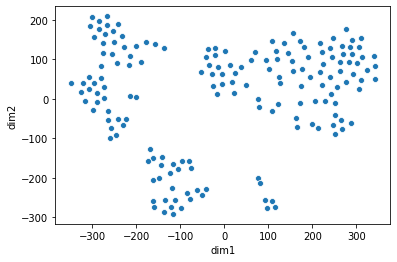

In [29]:
# Best results so far: metric='braycurtis', perplexity=30
tsne = skTSNE(metric='braycurtis', perplexity=20, init='pca')
embeddings = tsne.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

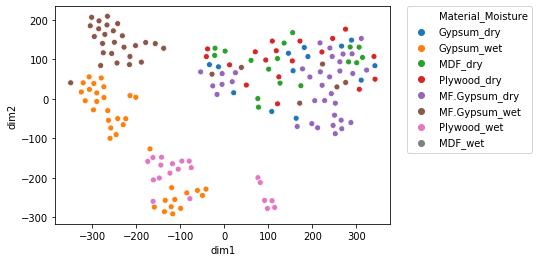

In [30]:
# Labeled t-SNE as specified by hue
plot_samples = pd.concat([plot_samples, NGS_map_table['Material_Moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material_Moisture', data = plot_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


#### UMAP for NGS OTU dataset

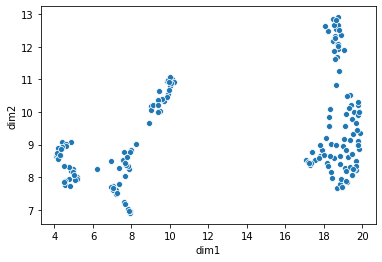

In [15]:
# Best results so far: metric='braycurtis', n_neighbors=20
reducer = umap.UMAP(n_components = 2, n_neighbors = 20, metric = 'braycurtis', random_state = 0)
embeddings = reducer.fit_transform(OTU_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

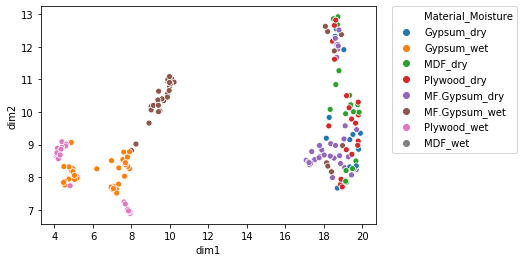

In [16]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, NGS_map_table['Material_Moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material_Moisture', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Analysis of NGS ITS dataset

#### t-SNE for NGS ITS dataset

In [17]:
# Formatting original NGS count data file
file_loc1 = "non-transformed_data/ITS_OTU_Table.txt"
ITS_table = pd.read_csv(file_loc1, sep='\t', low_memory=False)

# Sample table was transposed to match the format of the mapping table
ITS_table = ITS_table.T

#Remove ITS labels 
ITS_table = ITS_table.iloc[1: , :]

# Get rid of any duplicates
removed_rows = ['DUP']
ITS_table = ITS_table[~ITS_table.index.str.contains('|'.join(removed_rows))]

ITS_table

,0,1,2,3,4,5,6,7,8,9,...,26568,26569,26570,26571,26572,26573,26574,26575,26576,26577
loc1.MDF.wet.TP4.RE,1,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc2.MDF.wet.TP6.RE,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
loc2.Gypsum.wet.TP5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc2.Plywood.wet.TP3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc2.Gypsum.wet.TP4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
control.MDF.dry.TP6.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
control.Gypsum.dry.TP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
control.Gypsum.dry.TP5.RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loc1.Plywood.dry.TP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


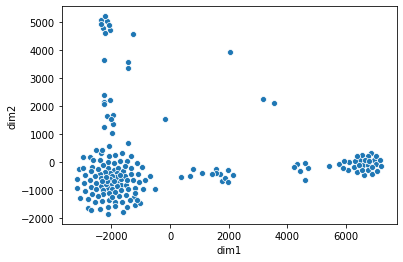

In [21]:
# Best results so far: metric='euclidean', perplexity=30
tsne = skTSNE(metric='euclidean', perplexity=30, init='pca')
embeddings = tsne.fit_transform(ITS_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = ITS_table.index)

# Outlining the parameters of the t-SNE test
tsne

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

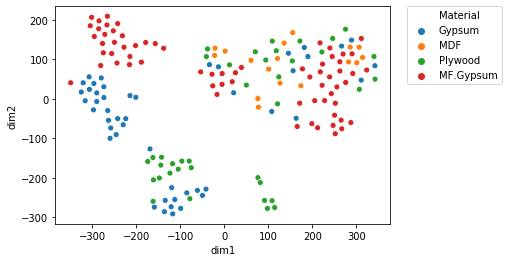

In [32]:
# Labeled t-SNE as specified by hue
plot_samples = pd.concat([plot_samples, NGS_map_table['Material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### UMAP for NGS ITS dataset

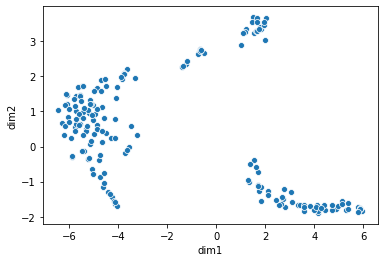

In [35]:
# Best results so far: metric='euclidean', n_neighbors=15
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'euclidean', random_state = 0)
embeddings = reducer.fit_transform(ITS_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = ITS_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

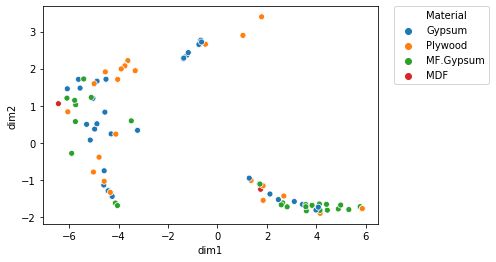

In [36]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, NGS_map_table['Material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Analysis of NGS metabolite dataset

#### t-SNE for NGS metabolite dataset

In [37]:
# Formatting original NGS count data file
file_loc1 = "non-transformed_data/Metabolomics_Data.txt"
metab_table = pd.read_csv(file_loc1, sep='\t', low_memory=False)

# Sample table was transposed to match the format of the mapping table
metab_table = metab_table.T

# Remove metabolite compound labels 
metab_table = metab_table.iloc[1: , :]

# Convert Metabolite IDs to Mapping IDs
id_table = pd.read_csv('non-transformed_data/NameConversion.txt', sep='\t')
id_dict = id_table.set_index('Metabolomics_ID').to_dict()

s = metab_table.index.to_series()
metab_table.index = s.map(id_dict['Mapping_ID']).fillna(s)

# t-SNE and UMAP ran into issues with certain values being NaN
metab_table = metab_table.dropna()

# Get rid of samples from time point 0 and any duplicates
removed_rows = ['TP0', 'Sloan']
metab_table = metab_table[~metab_table.index.str.contains('|'.join(removed_rows))]

metab_table

,0,1,2,3,4,5,6,7,8,9,...,6190,6191,6192,6193,6194,6195,6196,6197,6198,6199
control.MF.Gypsum.dry.TP1,137907,72928.1,72796.8,38990.9,35417.2,31736.2,21777.6,5286.02,55180.6,5523.41,...,3296.93,5169.02,5057.21,3006.81,3638.37,11079.3,6341,1489.39,2161.71,2420.82
control.Plywood.dry.TP1,162933,98137.5,85004.4,65241.1,131997,29354.6,18174.2,3553.67,64775.1,12446.6,...,3163.82,13979,5385.4,5484.8,2600.3,8099.11,5248.52,1190.39,2327.35,2132.64
control.MDF.dry.TP1,79121.2,82076,95563.2,5507.63,48050.5,37853,13077.7,10632.6,57700.2,34214.2,...,3261.16,7477.1,6617.06,5606.59,3507.75,8526.16,7568.52,1233.35,3094.94,2198.3
control.Gypsum.dry.TP1,91398.9,54044.9,65396.7,44704.4,36394.6,25679.6,12493.2,3032.45,58559.5,14001.3,...,3043.22,16077.5,9084.24,7526.52,2693.24,10526.9,5291.34,1232.94,2677.66,2208.86
control.MF.Gypsum.wet.TP1,125185,195780,72001.5,44151,40558.2,5622.87,12753.6,17664.6,69108.1,18786.3,...,2776.67,8101.66,5805.19,4482.02,2165.78,11720.1,6129.42,916.96,2847.55,1671.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Plywood.dry.TP6,9.82244e+07,1.79876e+08,1.56516e+06,2.85313e+07,9.64861e+07,41833,7.5218e+07,1.45675e+07,4.12549e+07,1.06743e+06,...,12038.5,15555.6,5877.6,7552.71,2782.13,11191.9,4848.73,1010.53,3570.54,1810.4
loc2.Gypsum.dry.TP6,5.79049e+07,5.73425e+07,2.42522e+07,1.7508e+07,1.44998e+07,105048,1.36059e+07,1.87234e+06,1.24538e+07,3.60717e+06,...,6417.9,8549.06,6599.4,6714.38,2631.45,10893.4,4618.9,1059.64,2964.78,1898.38
loc2.MF.Gypsum.wet.TP6,688276,1.10441e+06,89137.1,188523,1.05692e+06,49110,232817,122124,395510,45807.3,...,2868.89,23271,821.357,18276.9,2582.62,7579.92,5535.36,1182.3,1515.6,1839.22
loc2.MDF.wet.TP6,1.08698e+08,2.41142e+08,4.61922e+06,4.22556e+07,6.93556e+07,799817,3.61665e+07,3.08878e+07,4.20019e+07,3.49427e+07,...,18684.7,14266.8,5399.46,7175.95,3035.55,6708.37,5290.4,1389.65,5766.44,2489.6


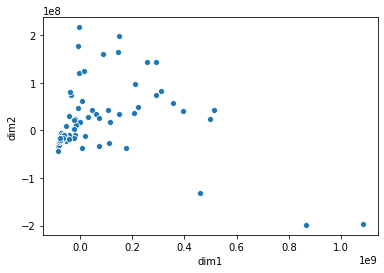

In [38]:
# Best results so far: metric='braycurtis', perplexity=10
tsne = skTSNE(metric='euclidean', perplexity=10, init='pca')
embeddings = tsne.fit_transform(metab_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

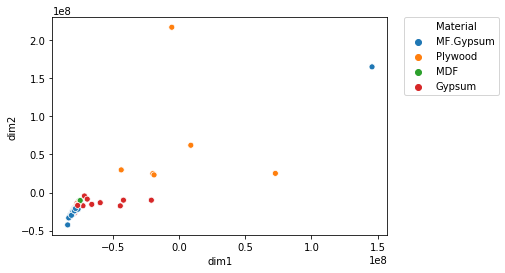

In [39]:
# Labeled t-SNE as specified by hue
plot_samples = pd.concat([plot_samples, NGS_map_table['Material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### UMAP for NGS metabolite dataset

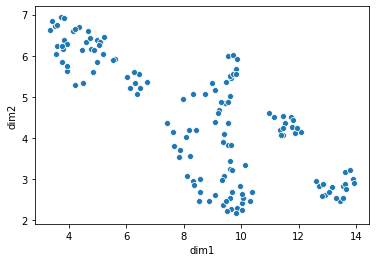

In [40]:
# Best results so far: metric='braycurtis', n_neighbors=15
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'braycurtis', random_state = 0)
embeddings = reducer.fit_transform(metab_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

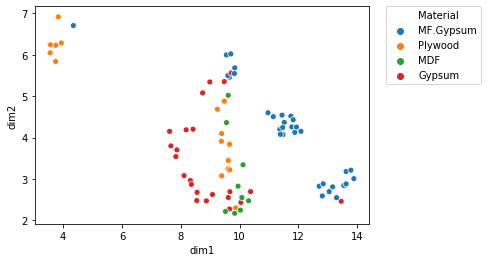

In [41]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, NGS_map_table['Material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'Material', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## Analysis of CLR-transformed data

### Analysis of CLR-tranformed OTU dataset

In [42]:
# Mapping table w/ features of interest
file_loc2 = "clr-transformed_data/16S_OTU_clr_Table_map.csv"

OTU_map_table = pd.read_csv(file_loc2, names=['location','material','wet_dry','time','ID'], skiprows=1)

# Create new column to show combined effects of material type and moisture
OTU_map_table["material_moisture"] = OTU_map_table["material"] + '.' + OTU_map_table["wet_dry"]

OTU_map_table

,location,material,wet_dry,time,ID,material_moisture
control.Gypsum.dry.TP0,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0,Gypsum.dry
control.Gypsum.dry.TP0.DUP,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0.DUP,Gypsum.dry
control.Gypsum.dry.TP1,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1,Gypsum.dry
control.Gypsum.dry.TP1.RE,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE,Gypsum.dry
control.Gypsum.dry.TP1.RE.DUP,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE.DUP,Gypsum.dry
...,...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,loc2,Plywood,wet,TP5,loc2.Plywood.wet.TP5.RE.DUP,Plywood.wet
loc2.Plywood.wet.TP6,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6,Plywood.wet
loc2.Plywood.wet.TP6.DUP,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.DUP,Plywood.wet
loc2.Plywood.wet.TP6.RE,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.RE,Plywood.wet


#### t-SNE for clr-transformed OTU dataset

In [43]:
# Formatting CLR transformed data file
file_loc1 = "clr-transformed_data/16S_OTU_clr_Table_zcomp_ogrows.csv"
OTU_table = pd.read_csv(file_loc1, low_memory=False)

'''t-SNE had an issue with string variables being in the index values of the table
   So, OTUs were reduced to exclusively number values'''
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.CleanUp.ReferenceOTU', value = '', regex = True) 
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.ReferenceOTU', value = '', regex = True) 

# Setting index to be OTU IDs
OTU_table = OTU_table.set_index('OTU')

# Sample table was transposed to match the format of the mapping table
OTU_table = OTU_table.T

# Get rid of samples from time point 0 and any duplicates
removed_rows = ['TP0', 'DUP']
OTU_table = OTU_table[~OTU_table.index.str.contains('|'.join(removed_rows))]

OTU_table

OTU,4479944,1050608,4307316,141700,185100,114072,590450,253429,1124709,1081058,...,34699,34757,34791,34796,34821,34824,34826,34840,34867,34905
control.Gypsum.dry.TP1,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,...,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613
control.Gypsum.dry.TP1.RE,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,...,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418
control.Gypsum.dry.TP2.RE,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,...,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,-0.023735,3.377462
control.Gypsum.dry.TP3.RE,-0.018111,-0.018111,-0.018111,1.368183,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,...,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111,-0.018111
control.Gypsum.wet.TP1,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,...,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545,-0.015545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc1.Plywood.wet.TP4.RE,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,...,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251,-0.005251
loc2.Plywood.wet.TP5,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,...,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,-0.014349,0.678798,-0.014349,-0.014349
loc2.Plywood.wet.TP5.RE,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,...,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115,-0.019115
loc2.Plywood.wet.TP6,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,...,-0.014190,-0.014190,0.678957,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190


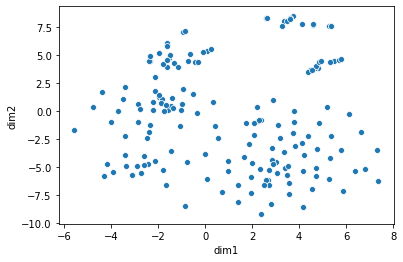

In [45]:
# Best results so far: metric='euclidean', perplexity=30
tsne = skTSNE(metric = 'euclidean', perplexity=30, init='pca')
embeddings = tsne.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

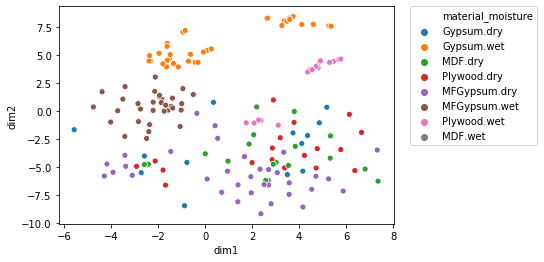

In [46]:
# Labeled t-SNE as specified by hue
plot_samples = pd.concat([plot_samples, OTU_map_table['material_moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture', data = plot_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### UMAP for clr-transformed OTU dataset

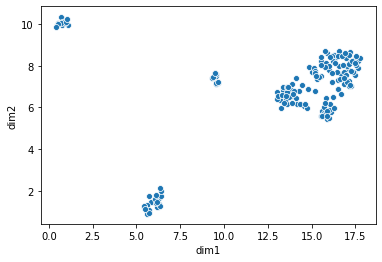

In [47]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'euclidean', random_state = 0)
embeddings = reducer.fit_transform(OTU_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

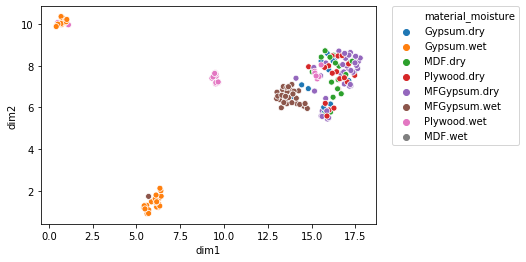

In [48]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, OTU_map_table['material_moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Analysis of CLR-transformed ITS dataset

In [49]:
# Mapping table w/ features of interest
file_loc2 = "clr-transformed_data/ITS_OTU_clr_Table_map.csv"

clr_ITS_map_table = pd.read_csv(file_loc2, names=['location','material','wet_dry','time','ID'], skiprows=1)

# Create new column to show combined effects of material type and moisture
clr_ITS_map_table["material_moisture"] = clr_ITS_map_table["material"] + '.' + clr_ITS_map_table["wet_dry"]

clr_ITS_map_table

,location,material,wet_dry,time,ID,material_moisture
loc1.MDF.wet.TP4.RE,loc1,MDF,wet,TP4,loc1.MDF.wet.TP4.RE,MDF.wet
loc2.MDF.wet.TP6.RE,loc2,MDF,wet,TP6,loc2.MDF.wet.TP6.RE,MDF.wet
loc2.Gypsum.wet.TP5,loc2,Gypsum,wet,TP5,loc2.Gypsum.wet.TP5,Gypsum.wet
loc2.Plywood.wet.TP3,loc2,Plywood,wet,TP3,loc2.Plywood.wet.TP3,Plywood.wet
loc2.Gypsum.wet.TP4,loc2,Gypsum,wet,TP4,loc2.Gypsum.wet.TP4,Gypsum.wet
...,...,...,...,...,...,...
control.Gypsum.dry.TP5.RE,control,Gypsum,dry,TP5,control.Gypsum.dry.TP5.RE,Gypsum.dry
loc1.Plywood.dry.TP5,loc1,Plywood,dry,TP5,loc1.Plywood.dry.TP5,Plywood.dry
loc1.Plywood.dry.TP6.RE.DUP,loc1,Plywood,dry,TP6,loc1.Plywood.dry.TP6.RE.DUP,Plywood.dry
control.Plywood.dry.TP5,control,Plywood,dry,TP5,control.Plywood.dry.TP5,Plywood.dry


In [50]:
# Formatting CLR transformed data file
file_loc1 = "clr-transformed_data/ITS_OTU_clr_Table_zcomp_og_rows.csv"
clr_ITS_table = pd.read_csv(file_loc1, low_memory=False)

# Sample table was transposed to match the format of the mapping table
clr_ITS_table = clr_ITS_table.T

# Get rid of samples from time point 0 and any duplicates
removed_rows = ['TP0', 'DUP', 'Unnamed:']
clr_ITS_table = clr_ITS_table[~clr_ITS_table.index.str.contains('|'.join(removed_rows))]

clr_ITS_table

,0,1,2,3,4,5,6,7,8,9,...,26568,26569,26570,26571,26572,26573,26574,26575,26576,26577
loc1.MDF.wet.TP4.RE,0.677571,-0.0155758,-0.0155758,-0.0155758,2.46933,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,...,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758,-0.0155758
loc2.MDF.wet.TP6.RE,-0.0218312,-0.0218312,-0.0218312,-0.0218312,-0.0218312,2.46308,-0.0218312,-0.0218312,-0.0218312,-0.0218312,...,-0.0218312,-0.0218312,-0.0218312,-0.0218312,-0.0218312,0.671316,-0.0218312,-0.0218312,-0.0218312,-0.0218312
loc2.Gypsum.wet.TP5,-0.0241877,0.66896,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,...,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877,-0.0241877
loc2.Plywood.wet.TP3,-0.0219731,-0.0219731,1.36432,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,...,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731,-0.0219731
loc2.Gypsum.wet.TP4,-0.0273496,-0.0273496,0.665798,-0.0273496,-0.0273496,-0.0273496,-0.0273496,-0.0273496,-0.0273496,-0.0273496,...,-0.0273496,-0.0273496,-0.0273496,-0.0273496,-0.0273496,0.665798,-0.0273496,-0.0273496,-0.0273496,-0.0273496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
control.MDF.dry.TP6.RE,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,...,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114,-0.00967114
control.Gypsum.dry.TP5,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,...,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306,-0.00714306
control.Gypsum.dry.TP5.RE,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,-0.0118237,...,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236,-0.0118236
loc1.Plywood.dry.TP5,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,...,-0.0111606,-0.0111606,-0.0111606,-0.0111606,-0.0111606,0.681987,-0.0111606,-0.0111606,-0.0111606,-0.0111606


#### t-SNE for CLR-transformed ITS dataset

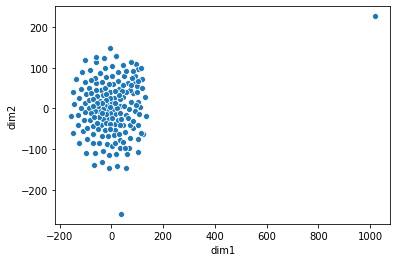

In [59]:
# Best results so far: metric='euclidean', perplexity=30
tsne = skTSNE(metric='euclidean', perplexity=30, init='pca')
embeddings = tsne.fit_transform(clr_ITS_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = clr_ITS_table.index)

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

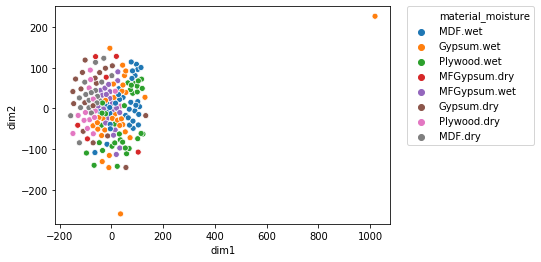

In [60]:
# Labeled t-SNE as specified by hue
plot_samples = pd.concat([plot_samples, clr_ITS_map_table['material_moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture', data = plot_samples)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### UMAP for CLR-transformed ITS dataset

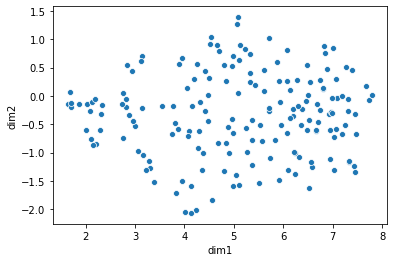

In [61]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 20, metric = 'euclidean', random_state = 0)
embeddings = reducer.fit_transform(clr_ITS_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = clr_ITS_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

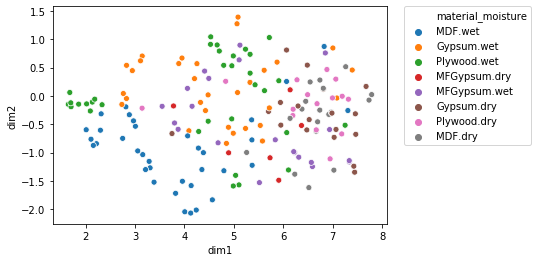

In [62]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, clr_ITS_map_table['material_moisture']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Analysis of CLR-transformed metabolite dataset

#### t-SNE for CLR-transformed metabolite dataset

In [63]:
file_loc3 = "clr-transformed_data/metabolites_clr_Table_zcomp.csv"
metab_table = pd.read_csv(file_loc3, low_memory=False)

metab_table = metab_table.T

# Get rid of samples from time point 0 and any duplicates
removed_rows = ['TP0', 'Unnamed:']
metab_table = metab_table[~metab_table.index.str.contains('|'.join(removed_rows))]

metab_table

,0,1,2,3,4,5,6,7,8,9,...,6190,6191,6192,6193,6194,6195,6196,6197,6198,6199
control.MF.Gypsum.dry.TP1,2.78762,2.15052,2.14871,1.52437,1.42824,1.3185,0.941923,-0.473892,1.87166,-0.429962,...,-0.945965,-0.496275,-0.518142,-1.03808,-0.847422,0.26612,-0.29192,-1.74059,-1.36806,-1.25485
control.Plywood.dry.TP1,3.04027,2.5333,2.38964,2.12502,2.82971,1.32638,0.846936,-0.785087,2.11786,0.468383,...,-0.901288,0.584488,-0.369374,-0.351087,-1.09744,0.0386873,-0.395121,-1.87878,-1.20834,-1.29571
control.MDF.dry.TP1,2.00086,2.03752,2.18967,-0.663987,1.50213,1.26359,0.200787,-0.00619327,1.68514,1.16252,...,-1.18804,-0.358276,-0.480471,-0.646179,-1.11515,-0.226983,-0.346125,-2.16039,-1.24035,-1.58244
control.Gypsum.dry.TP1,2.5689,2.04349,2.23414,1.85374,1.64809,1.29937,0.578855,-0.83696,2.12371,0.692823,...,-0.833413,0.831092,0.260211,0.0721029,-0.955584,0.407599,-0.280258,-1.73693,-0.961388,-1.15385
control.MF.Gypsum.wet.TP1,2.5464,2.9936,1.9933,1.50422,1.41935,-0.556549,0.262424,0.58817,1.95228,0.649739,...,-1.26214,-0.191322,-0.524638,-0.783316,-1.51061,0.177911,-0.470291,-2.37008,-1.23693,-1.76966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Gypsum.dry.TP6,7.80573,7.79597,6.93544,6.60959,6.42106,1.4936,6.35744,4.37412,6.26896,5.02986,...,-1.30173,-1.015,-1.27385,-1.25657,-2.19329,-0.772664,-1.63067,-3.1029,-2.07402,-2.51982
loc2.MF.Gypsum.wet.TP6,4.33241,4.80529,2.2884,3.03744,4.76134,1.69229,3.24848,2.60326,3.7784,1.62267,...,-1.14785,0.94543,-2.39857,0.70386,-1.25297,-0.176273,-0.49062,-2.03432,-1.78596,-1.59244
loc2.Plywood.wet.TP6,8.54052,8.72095,6.70614,7.35106,5.717,6.38682,6.67007,3.43837,7.04385,4.10596,...,-0.518887,-0.784466,-1.50951,-1.02604,-1.77987,-1.74986,-1.22437,-2.56121,-1.75582,-1.97814
loc2.MDF.wet.TP6,8.27439,9.0712,5.11605,7.32956,7.82507,3.36245,7.17395,7.01618,7.32353,7.13953,...,-0.394229,-0.664,-1.63564,-1.3512,-2.21154,-1.41858,-1.65604,-2.99289,-1.56988,-2.40981


In [64]:
# Mapping table w/ features of interest
file_loc4 = "clr-transformed_data/metab_map.csv"

metab_map_table = pd.read_csv(file_loc4, names=['location_m','material_m','wet_dry_m','time_m','ID_m'], skiprows=1)

metab_map_table["material_moisture_m"] = metab_map_table["material_m"] + '.' + metab_map_table["wet_dry_m"]

metab_map_table

,location_m,material_m,wet_dry_m,time_m,ID_m,material_moisture_m
control.MF.Gypsum.dry.TP0,control,MFGypsum,dry,TP0,control.MF.Gypsum.dry.TP0,MFGypsum.dry
control.Plywood.dry.TP0,control,Plywood,dry,TP0,control.Plywood.dry.TP0,Plywood.dry
control.MDF.dry.TP0,control,MDF,dry,TP0,control.MDF.dry.TP0,MDF.dry
control.Gypsum.dry.TP0,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0,Gypsum.dry
loc1.MF.Gypsum.dry.TP0,loc1,MFGypsum,dry,TP0,loc1.MF.Gypsum.dry.TP0,MFGypsum.dry
...,...,...,...,...,...,...
loc2.Gypsum.dry.TP6,loc2,Gypsum,dry,TP6,loc2.Gypsum.dry.TP6,Gypsum.dry
loc2.MF.Gypsum.wet.TP6,loc2,MFGypsum,wet,TP6,loc2.MF.Gypsum.wet.TP6,MFGypsum.wet
loc2.Plywood.wet.TP6,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6,Plywood.wet
loc2.MDF.wet.TP6,loc2,MDF,wet,TP6,loc2.MDF.wet.TP6,MDF.wet


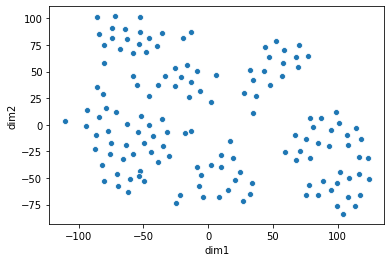

In [73]:
# Best results so far: metric='euclidean', perplexity=30
tsne = skTSNE(metric = 'euclidean', perplexity=30, init='pca')
embeddings = tsne.fit_transform(metab_table)
plot_metab = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)

# Unlabeled t-SNE
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_metab)

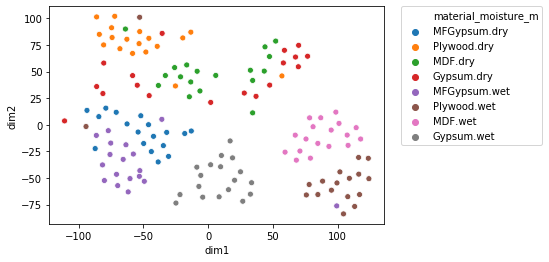

In [74]:
# Labeled t-SNE as specified by hue
plot_metab = pd.concat([plot_metab, metab_map_table['material_moisture_m']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture_m', data = plot_metab)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### UMAP for CLR-transformed metabolite dataset

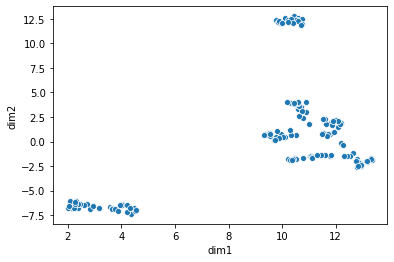

In [75]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'euclidean', random_state = 0)
embeddings = reducer.fit_transform(metab_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)

# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

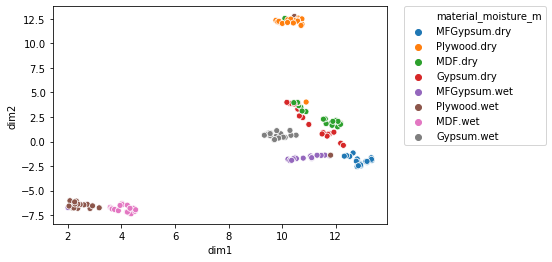

In [76]:
# Labeled UMAP as specified by hue
plot_df = pd.concat([plot_df, metab_map_table['material_moisture_m']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material_moisture_m', data = plot_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)